In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Real_Combine.csv')

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
data.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [5]:
# null values
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
data = data.dropna()

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
# correlation
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


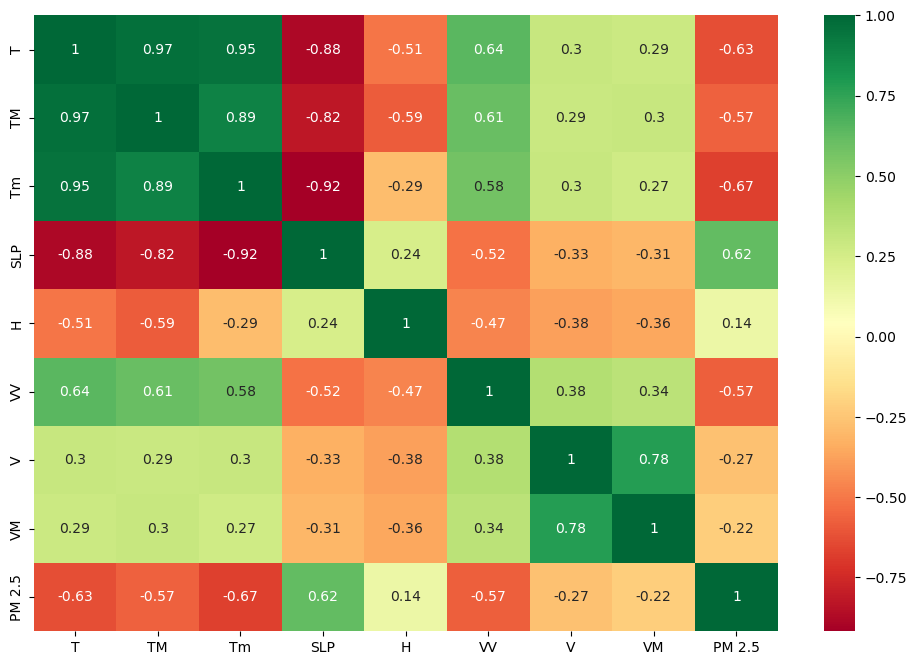

In [9]:
# corr with heatmap
plt.figure(figsize=(12,8))
corr_mat = data.corr()
top_features = corr_mat.index
sns.heatmap(data[top_features].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [10]:
# feature importance

In [11]:
from sklearn.ensemble import ExtraTreesRegressor

feat_imp = ExtraTreesRegressor()
feat_imp.fit(X,y)

ExtraTreesRegressor()

In [12]:
feat_imp.feature_importances_

array([0.16843917, 0.11861108, 0.22950976, 0.11959015, 0.08977783,
       0.17944953, 0.0533763 , 0.04124618])

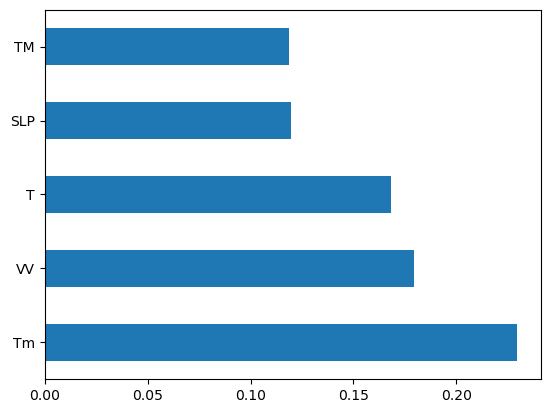

In [13]:
feature_importances = pd.Series(feat_imp.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

<Axes: xlabel='PM 2.5', ylabel='Count'>

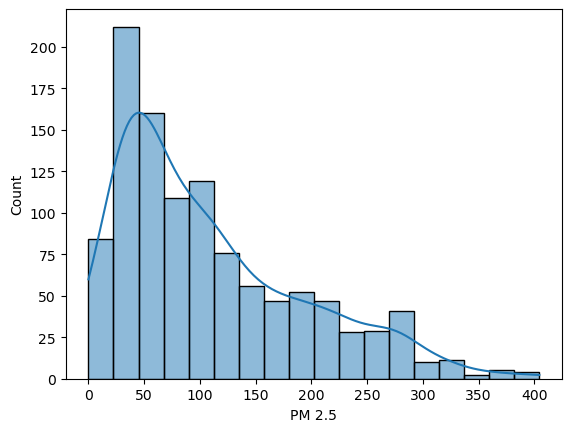

In [14]:
sns.histplot(y, kde=True)

In [15]:
# train and test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((764, 8), (328, 8), (764,), (328,))

### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='squared_error')
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dt.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [20]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dt.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7057122067447013


In [21]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt,X,y,cv=5)

In [22]:
score.mean()

0.4392458626609672

In [23]:
# model evaluation

In [24]:
y_pred = dt.predict(X_test)

<Axes: xlabel='PM 2.5', ylabel='Count'>

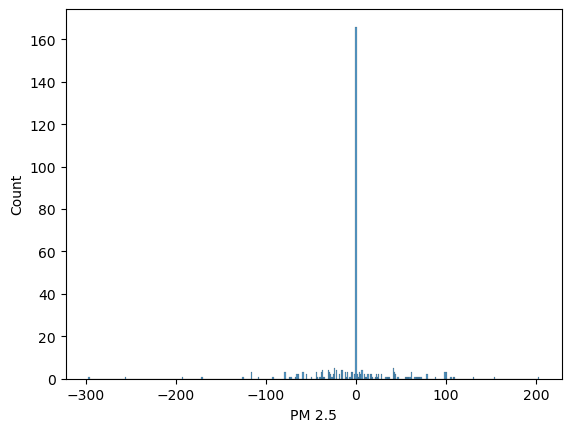

In [25]:
sns.histplot(y_test-y_pred)

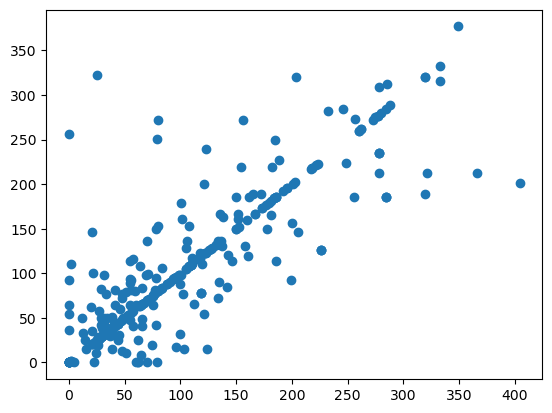

In [26]:
plt.scatter(y_test,y_pred)

In [27]:
#hyperparameter tuning

In [28]:
params = {"splitter" : ["best","random"] ,
         "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
         "min_samples_leaf" : [ 1,2,3,4,5 ],
         "min_weight_fraction_leaf" : [0.1,0.2,0.3,0.4],
         "max_features" : ["auto","log2","sqrt",None ],
         "max_leaf_nodes" : [None,10,20,30,40,50,60,70]
}

In [29]:
from sklearn.model_selection import GridSearchCV

random_search = GridSearchCV(dt, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1,cv=5)

In [30]:
random_search.fit(X,y)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12800 fits failed out of a total of 51200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9677 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dell\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
random_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [32]:
random_search.best_score_

-3209.3903389563093

In [33]:
predictions = random_search.predict(X_test)

<Axes: xlabel='PM 2.5', ylabel='Count'>

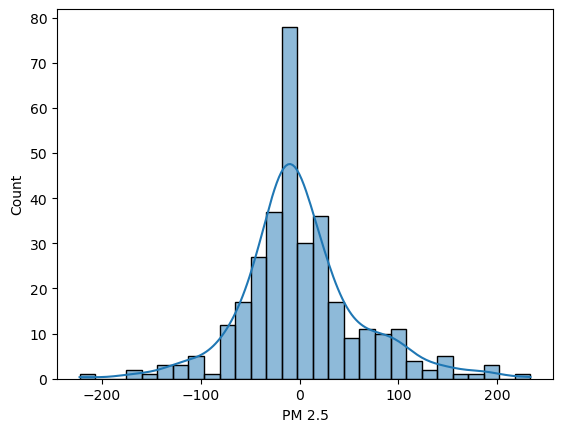

In [34]:
sns.histplot(y_test-predictions, kde=True)

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 42.654802502969986
MSE: 3632.849684878562
RMSE: 60.27312572679936


In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 23.06108993902439
MSE: 2108.219302220952
RMSE: 45.91534930958222


In [73]:
import pickle

file = open('decision_tree_model.pkl', 'wb')
pickle.dump(dt, file)

### KNN Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [39]:
print('coeffecient of detrmination:', knn.score(X_train, y_train))

coeffecient of detrmination: 1.0


In [40]:
print('coeffecient of detrmination:', knn.score(X_test, y_test))

coeffecient of detrmination: 0.5417545333477789


In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,X,y,cv=5)

In [54]:
score.mean()

0.39387489016756577

In [45]:
# model evaluation

In [46]:
y_pred = knn.predict(X_test)

<Axes: xlabel='PM 2.5', ylabel='Count'>

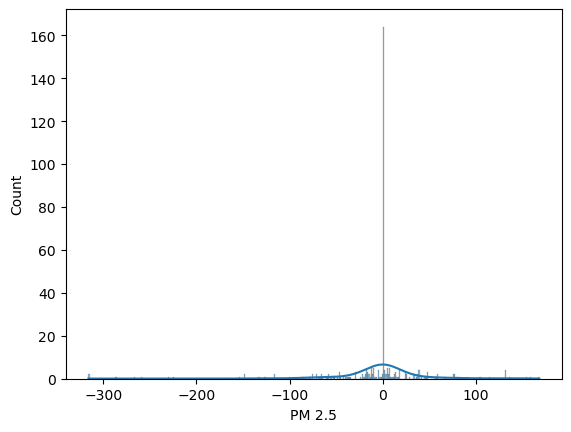

In [47]:
sns.histplot(y_test-y_pred, kde=True)

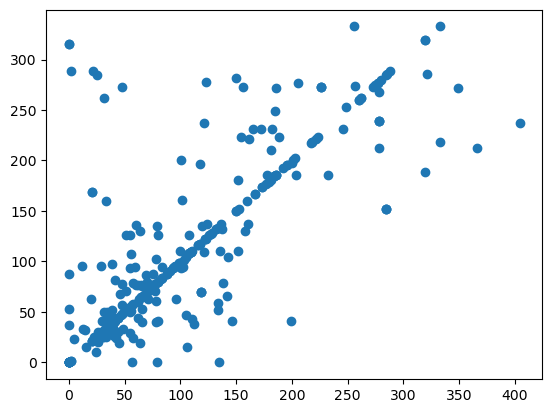

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 26.46491361788618
MSE: 3282.779510713076
RMSE: 57.295545295538254


In [50]:
# Hyperparameter tuning

In [66]:
accuracy_rate = []

for i in range(1,40):
    knn_ = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn_,X,y,cv=10,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())

In [67]:
# accuracy_rate

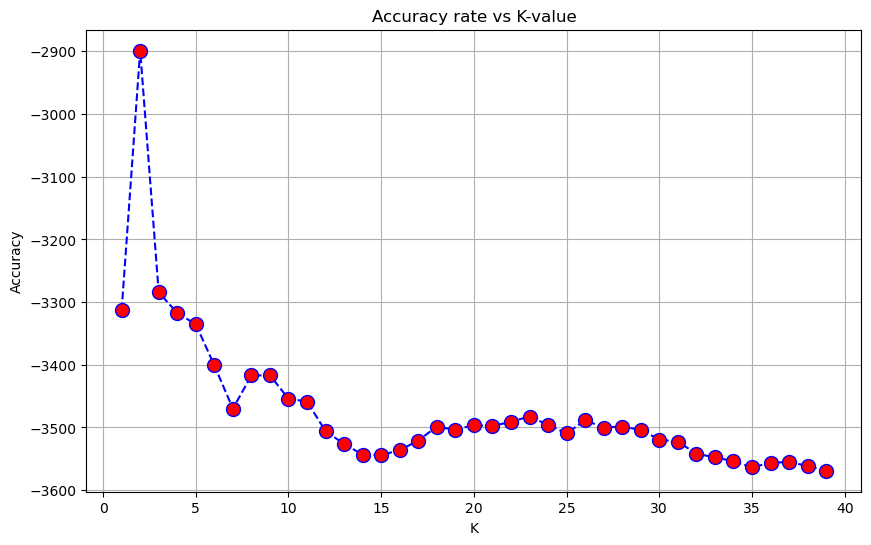

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy rate vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### Lasso regression

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

In [81]:
lasso_regressor.fit(X,y)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+06, tolerance: 6.146e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+06, tolerance: 6.790e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+06, tolerance: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [82]:
lasso_regressor.best_params_

{'alpha': 1}

In [83]:
lasso_regressor.best_score_

-3666.7832534370186

In [84]:
y_pred = lasso_regressor.predict(X_test)

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 44.50831198875127
MSE: 3627.8109390424697
RMSE: 60.2313119485411


### RandomForest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [100]:
y_pred = rf.predict(X_test)

In [101]:
score=cross_val_score(rf,X,y,cv=5)

In [102]:
score.mean()

0.7221330209171186

<Axes: xlabel='PM 2.5', ylabel='Count'>

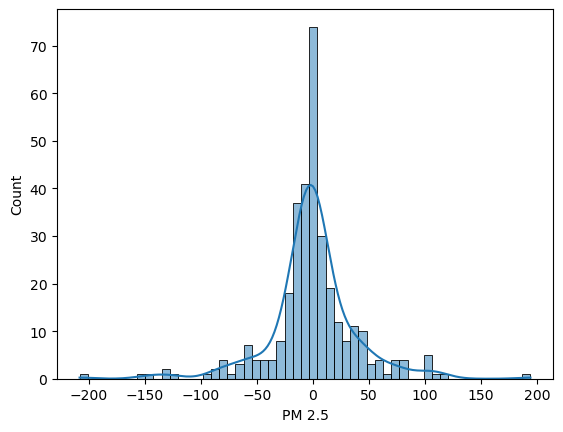

In [103]:
sns.histplot(y_test-y_pred, kde=True)

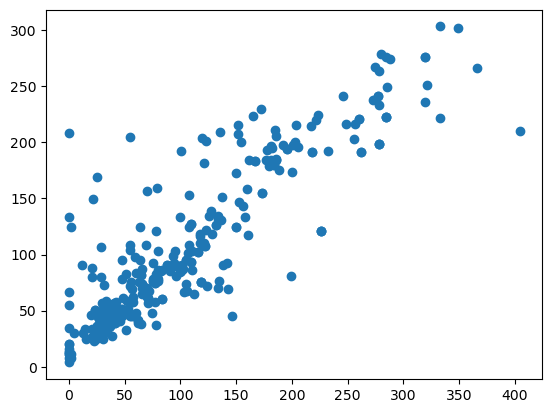

In [104]:
plt.scatter(y_test, y_pred)

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 24.339283155487806
MSE: 1576.7360976920368
RMSE: 39.70813641676019


In [106]:
# Hyperparameter Tuning

In [108]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1,2,5,10]

In [109]:
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [111]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)


In [112]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dell\anaconda3\Lib\site-packages\sk

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [115]:
rf_random.best_score_

-1554.9373982221337

In [116]:
predictions=rf_random.predict(X_test)

<Axes: xlabel='PM 2.5', ylabel='Count'>

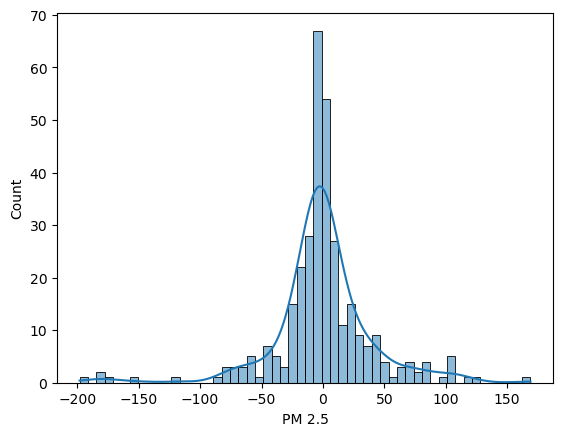

In [118]:
sns.histplot(y_test-predictions, kde=True)

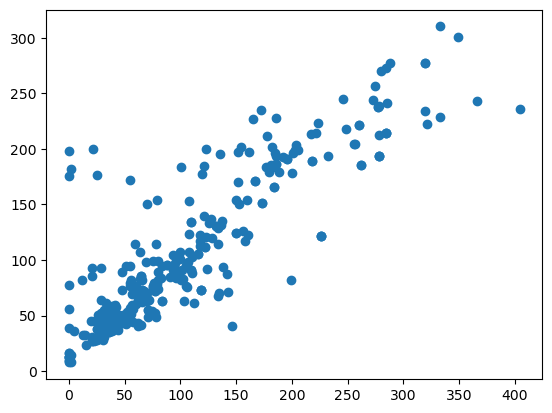

In [120]:
plt.scatter(y_test,predictions)

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.712538320869207
MSE: 1669.0500830369958
RMSE: 40.854009387537424


In [122]:
import pickle

file = open('randomforest_regressor.pkl', 'wb')
pickle.dump(rf_random, file)

In [125]:
# pip install xgboost

### XGBoost Regressor

In [128]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [129]:
score=cross_val_score(xgbr,X,y,cv=5)

In [130]:
score.mean()

0.744970110899368

In [131]:
y_pred = xgbr.predict(X_test)

In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19.813113085159323
MSE: 1433.6535182065822
RMSE: 37.863617341804286


In [133]:
# hyperparameter tuning

In [145]:
# n_estimators = [x for x in np.linspace(start=100, stop=1200, num=12)]
# learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# max_depth = [x for x in np.linspace(5,30,num=6)]
# subsample=[0.7,0.6,0.8]
# min_child_weight=[3,4,5,6,7]
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [146]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [147]:
xgb = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator=xgbr, param_distributions=random_grid, 
                                scoring='neg_mean_squared_error', n_iter = 100, 
                                cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [153]:
xgb_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.3s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [154]:
xgb_random.best_params_

{'subsample': 0.6,
 'n_estimators': 800,
 'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [155]:
xgb_random.best_score_

-1395.0297224889714

In [156]:
predictions=xgb_random.predict(X_test)

In [157]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5018187482992752
MSE: 0.9244845519355345
RMSE: 0.9615011970536149


In [158]:
file = open('xgboost_regressor.pkl', 'wb')
pickle.dump(xgb_random, file)